# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [15]:
# Your code here
import pandas as pd
 
df = pd.read_csv('otto_group.csv')
display(df.head())
display(df.info())

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

None

In [20]:
# Your code here
display(df.isna().sum().max())
display(df.isna().any().any())

0

False

In [19]:
# Your code here
display(df.describe())

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


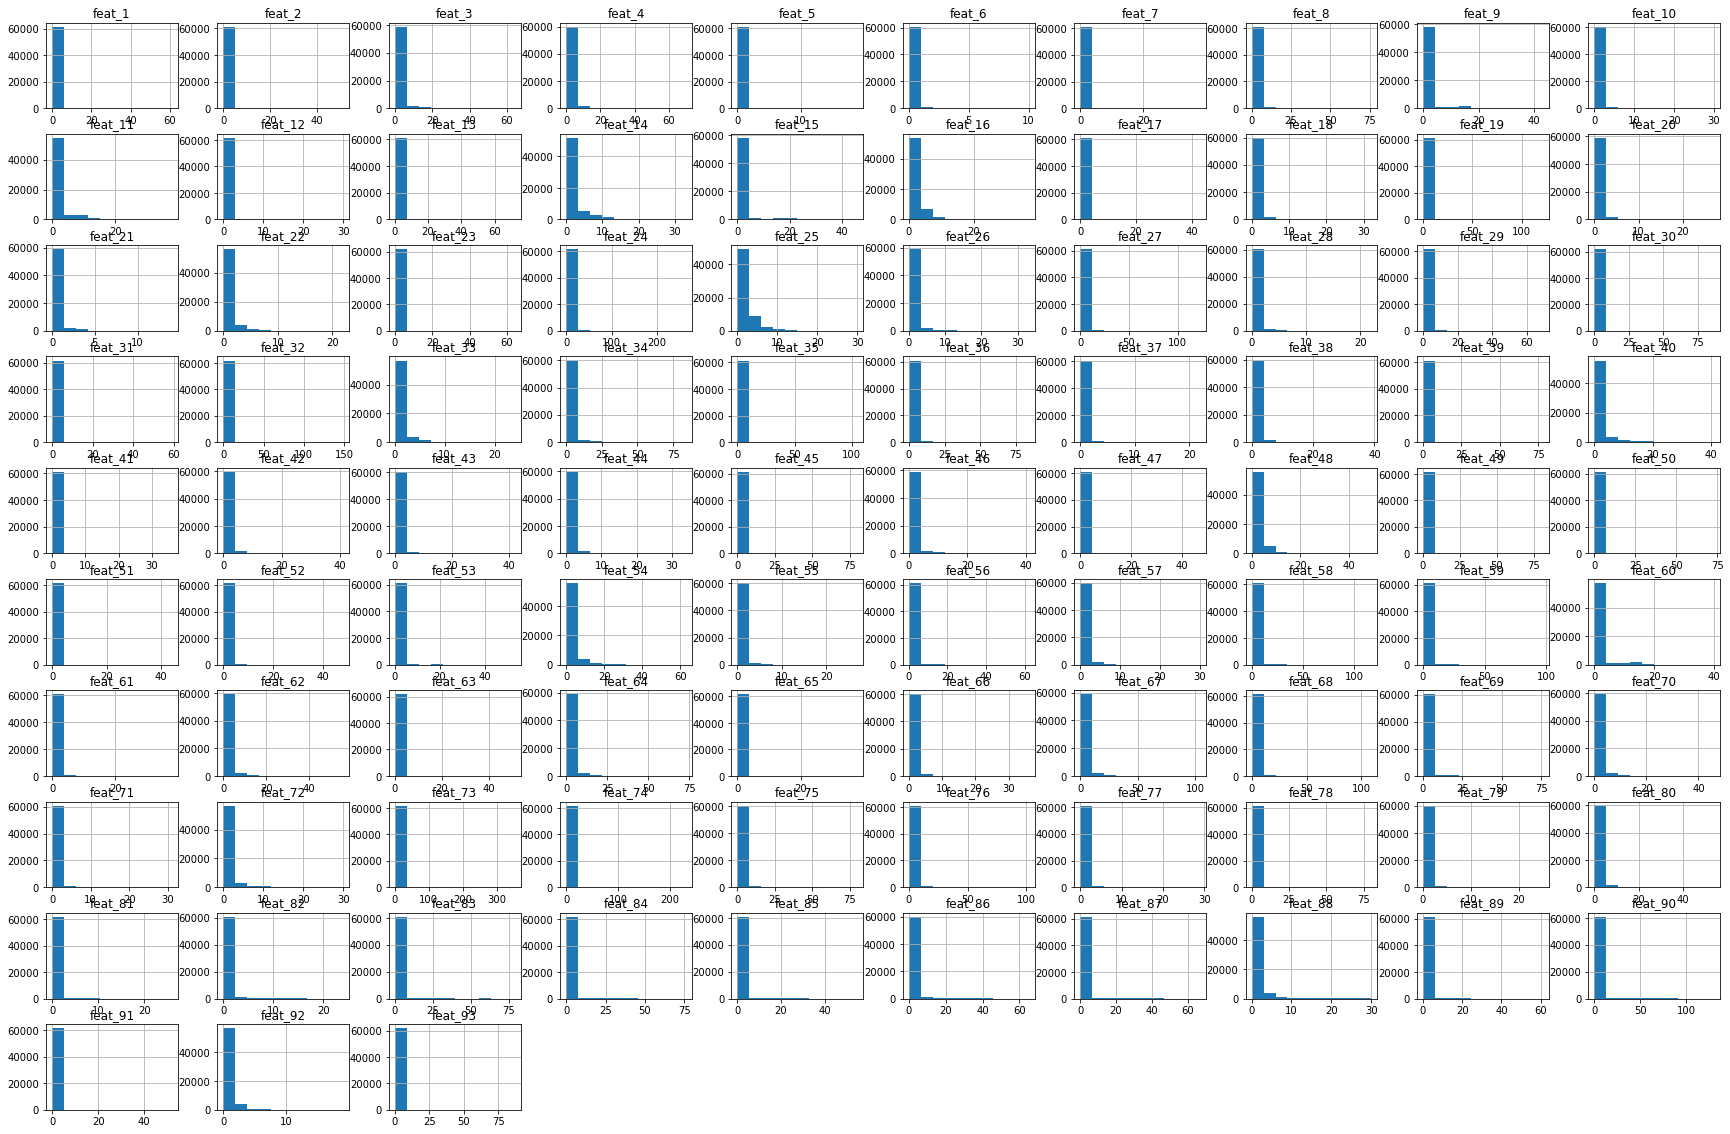

In [24]:
# Your code here
feat = df.loc[:, 'feat_1':'feat_93']#'feat_1':'feat_93']
feat.hist(figsize=(30,20));

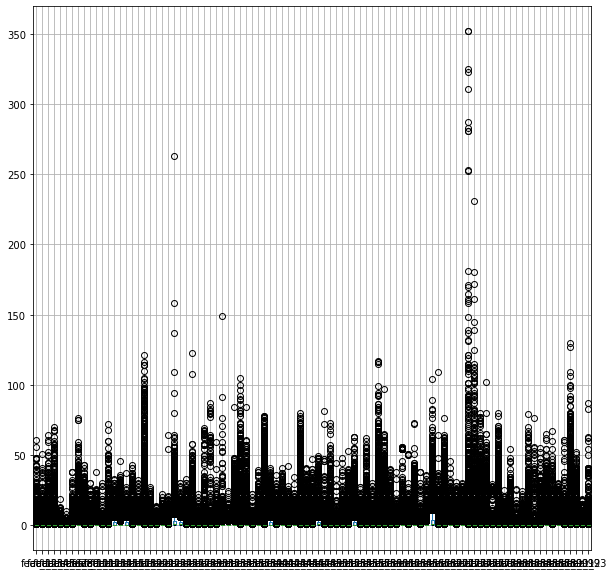

In [25]:
# Your code here
feat.boxplot(figsize=(10,10));

In [38]:
# Your code here
target = df['target']

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

In [ ]:
# Your code here

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [ ]:
# Your code here

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

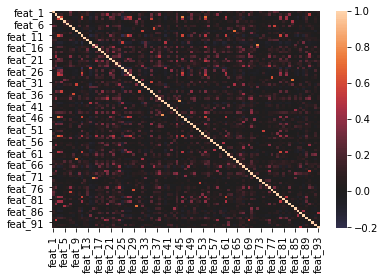

In [30]:
# Your code here
feat = df.loc[:, 'feat_1':'feat_93']

import seaborn as sns
sns.heatmap(feat.corr(), center=0);

In [31]:
feat.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82', 'feat_83'

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [37]:
# Your code here
from sklearn.decomposition import PCA
import numpy as np
pcas = {}
threshold = 0.01
target = .8
lower=10
upper=60
curr_comp = int((lower+upper)/2)
while True:
    pca_curr = PCA(n_components=curr_comp)
    principal_comps = pca_curr.fit_transform(feat)
    exp_var_rat = np.sum(pca_curr.explained_variance_ratio_)
    if exp_var_rat < target - threshold:
        lower = curr_comp
        curr_comp = int((lower+upper)/2)
    elif exp_var_rat > target + threshold: 
        upper = curr_comp
        curr_comp = int((lower+upper)/2)
    else:
        print(np.sum(pca_curr.explained_variance_ratio_))
        print(curr_comp)   
        break


0.8086433477536518
28


In [51]:
# Your code here
curr_comp

28

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [44]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.4, random_state=42)

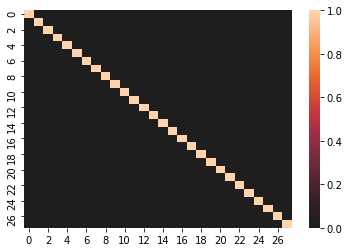

In [50]:
# Your code here
import seaborn as sns
sns.heatmap(pd.DataFrame(principal_comps).corr(), center=0);

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [52]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', LogisticRegression(random_state=123))
    ])


In [54]:
# Your code here
#fitting the model
pipe.fit(X_train, y_train)

#testing the result
print(pipe.score(X_test, y_test))

0.7316984486102133


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# Your code here
#manually check accuracy:
np.sum(pipe.predict(X_test) == y_test)/len(y_test)


0.7316984486102133

In [59]:
pipe_lr = pipe

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [63]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Linear SVM
pipe_svm = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', svm.SVC(random_state=123))
    ])

#Decision Tree
pipe_dt = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', tree.DecisionTreeClassifier(random_state=123))
    ])

#Random Forest
pipe_rf = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', RandomForestClassifier(random_state=123))
    ])

pipes=[pipe_svm, pipe_dt, pipe_rf]
pipelabels=['SVM', 'DT', 'RF']
for pipe, pipelabel in zip(pipes, pipelabels):
    pipe.fit(X_train, y_train)
    print('Accuracy score for {} model: {}'.format(pipelabel, pipe.score(X_test, y_test)))
    

0.7550096961861668
0.6666127989657401
0.773109243697479


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [65]:
# Your code here 
# imports
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [67]:
# Your code here
# ⏰ This cell may take a long time to run!
pipe_rf = Pipeline([('pca', PCA(n_components=curr_comp)), 
                    ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=1, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best accuracy: 0.618

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}


Use your grid search object along with `.cv_results` to get the full result overview

In [68]:
# Your code here 
gs_rf.cv_results_

{'mean_fit_time': array([8.39064892, 8.40012161, 7.37463013, 5.5896136 , 5.63425454,
        5.62979722, 2.89322368, 2.90676045, 2.884926  , 8.76918014,
        8.78543433, 7.50976038, 5.57197698, 5.61381348, 5.59127943,
        2.88488889, 2.91463367, 2.90478381, 4.70057678, 4.65735356,
        4.17600695, 3.68524941, 3.67557581, 3.64164035, 2.3555402 ,
        2.38583366, 2.38404361, 5.07248187, 5.01923807, 4.28920619,
        3.62871734, 3.70218873, 3.67784071, 2.40805252, 2.4090813 ,
        2.39753032]),
 'std_fit_time': array([0.04371245, 0.02275416, 0.11681059, 0.08252461, 0.07034432,
        0.08174932, 0.02126648, 0.03712438, 0.00978081, 0.11983662,
        0.06131835, 0.10846686, 0.09106241, 0.04453849, 0.06464306,
        0.03481817, 0.03758381, 0.03312161, 0.02837823, 0.01188259,
        0.05702269, 0.04665866, 0.04444372, 0.0328934 , 0.05142504,
        0.02939331, 0.0341561 , 0.05662637, 0.01601228, 0.06056851,
        0.08530129, 0.01436072, 0.01595422, 0.0326982 , 0.022

### AdaBoost

In [69]:
# Your code here
from sklearn.ensemble import AdaBoostClassifier
# ⏰ This cell may take several minutes to run
pipe_ada = Pipeline([('pca', PCA(n_components=curr_comp)), 
                    ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, ],
    'clf__learning_rate': [1.0, 0.1]
}

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=1, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best accuracy: 0.619

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.1, 'clf__n_estimators': 120}


Use your grid search object along with `.cv_results` to get the full result overview: 

In [70]:
# Your code here 
gs_ada.cv_results_

NameError: name 'gs_ada' is not defined

### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [ ]:
# Your code here
# ⏰ This cell may take a very long time to run!
# Construct pipeline
pipe_svm = Pipeline([('pca', PCA(n_components=27)), 
                     ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10] , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm, 
                      param_grid=param_grid_svm, 
                      scoring='accuracy', 
                      cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

Use your grid search object along with `.cv_results` to get the full result overview: 

In [ ]:
# Your code here 
gs_svm.cv_results_

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?